## Importación de librerias necesarias

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from utils import classification_report
from limpieza_df import limpiar_df, standarize_X_train, standarize_X_test
from funciones_evaluacion_modelos import evaluation_metrics,cv_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier # aunque los árboles no son muy robustos para datos atípicos es un buen ejemplo para mostrarlo y ver cuánto overfitting producen estos modelos con datasets donde los datos atípicos también son relevantes.
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan
from sklearn.cluster import AgglomerativeClustering

## Parte 3: Aprendizaje No Supervisado

In [61]:
df = pd.read_csv("FICO_Dataset.csv", sep = ";")
output = "RiskPerformance"
inputs = list(df)[1:]

In [62]:
# Eliminamos los datos nulos de la columna output
df = df.dropna(subset=["RiskPerformance"])
# Eliminar las filas que contienen los valores -9 en cualquier columna
df = df[~df.isin([-9]).any(axis=1)]

# Pasamos ahora a hacer el train test split

# Paso 1: Shuffle the data (check out the .sample() method in pandas)
df = df.sample(frac=1)

from sklearn.impute import KNNImputer

# Crear el imputador KNN con, por ejemplo, 2 vecinos
imputer = KNNImputer(weights="uniform")

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# Paso 2: Separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)
X = df[inputs]
y = df[output]

## 1: PCA

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd

X = scale(df[inputs])

# Aplicar PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Crear un DataFrame para los loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=df[inputs].columns)
loadings

PC1       PC2       PC3       PC4  \
ExternalRiskEstimate         -0.406785 -0.350645 -0.176153 -0.269034   
NetFractionRevolvingBurden    0.383038  0.279609  0.195288 -0.107945   
AverageMInFile               -0.319755 -0.049150  0.599991 -0.128567   
MSinceOldestTradeOpen        -0.343851  0.084153  0.554688 -0.125969   
PercentTradesWBalance         0.402673  0.164036  0.156980 -0.433963   
PercentInstallTrades          0.231377  0.107492 -0.059513 -0.581587   
NumSatisfactoryTrades        -0.295590  0.598849 -0.148915  0.006090   
NumTotalTrades               -0.275152  0.616563 -0.108428  0.023840   
PercentTradesNeverDelq       -0.263093 -0.015376 -0.447059 -0.387731   
MSinceMostRecentInqexcl7days -0.139103 -0.109093  0.034439 -0.453942   

                                   PC5       PC6       PC7       PC8  \
ExternalRiskEstimate         -0.181636 -0.099856 -0.179520  0.346198   
NetFractionRevolvingBurden    0.222518 -0.454004  0.483875  0.335997   
AverageMInFile               -0.117081 -0.081535 -0.046591  0.530046   
MSinceOldestTradeOpen        -0.128185 -0.097784  0.187756 -0.642506   
PercentTradesWBalance        -0.055455 -0.258037 -0.715727 -0.123727   
PercentInstallTrades         -0.461845  0.512752  0.336105  0.049325   
NumSatisfactoryTrades         0.026063  0.059014 -0.087880  0.123189   
NumTotalTrades                0.017032  0.117333 -0.126038  0.067797   
PercentTradesNeverDelq       -0.055299 -0.573310  0.217287 -0.185865   
MSinceMostRecentInqexcl7days  0.816671  0.303756  0.012643 -0.037847   

                                   PC9      PC10  
ExternalRiskEstimate          0.642067  0.029532  
NetFractionRevolvingBurden    0.350212 -0.000532  
AverageMInFile               -0.460782 -0.055014  
MSinceOldestTradeOpen         0.272530  0.052977  
PercentTradesWBalance         0.015680  0.022407  
PercentInstallTrades         -0.038496  0.005238  
NumSatisfactoryTrades        -0.005652  0.710423  
NumTotalTrades                0.125819 -0.693864  
PercentTradesNeverDelq       -0.400294 -0.081315  
MSinceMostRecentInqexcl7days -0.026158 -0.002082

In [64]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],index=df[inputs].columns)
loading_matrix

PC1       PC2       PC3       PC4  \
ExternalRiskEstimate         -0.699935 -0.477398 -0.216472 -0.275594   
NetFractionRevolvingBurden    0.659074  0.380683  0.239987 -0.110577   
AverageMInFile               -0.550186 -0.066917  0.737323 -0.131702   
MSinceOldestTradeOpen        -0.591646  0.114572  0.681650 -0.129041   
PercentTradesWBalance         0.692859  0.223332  0.192911 -0.444544   
PercentInstallTrades          0.398118  0.146348 -0.073135 -0.595769   
NumSatisfactoryTrades        -0.508607  0.815323 -0.183000  0.006239   
NumTotalTrades               -0.473441  0.839440 -0.133246  0.024421   
PercentTradesNeverDelq       -0.452690 -0.020935 -0.549385 -0.397186   
MSinceMostRecentInqexcl7days -0.239347 -0.148529  0.042321 -0.465011   

                                   PC5       PC6       PC7       PC8  \
ExternalRiskEstimate         -0.175775 -0.091609 -0.104173  0.175492   
NetFractionRevolvingBurden    0.215339 -0.416507  0.280785  0.170321   
AverageMInFile               -0.113304 -0.074801 -0.027036  0.268686   
MSinceOldestTradeOpen        -0.124049 -0.089708  0.108952 -0.325693   
PercentTradesWBalance        -0.053666 -0.236726 -0.415325 -0.062719   
PercentInstallTrades         -0.446945  0.470404  0.195037  0.025004   
NumSatisfactoryTrades         0.025222  0.054140 -0.050995  0.062446   
NumTotalTrades                0.016483  0.107642 -0.073138  0.034367   
PercentTradesNeverDelq       -0.053515 -0.525960  0.126088 -0.094217   
MSinceMostRecentInqexcl7days  0.790323  0.278669  0.007337 -0.019185   

                                   PC9      PC10  
ExternalRiskEstimate          0.280299  0.007569  
NetFractionRevolvingBurden    0.152888 -0.000136  
AverageMInFile               -0.201158 -0.014101  
MSinceOldestTradeOpen         0.118975  0.013579  
PercentTradesWBalance         0.006845  0.005743  
PercentInstallTrades         -0.016806  0.001343  
NumSatisfactoryTrades        -0.002467  0.182093  
NumTotalTrades                0.054927 -0.177848  
PercentTradesNeverDelq       -0.174751 -0.020842  
MSinceMostRecentInqexcl7days -0.011419 -0.000534

<AxesSubplot: >

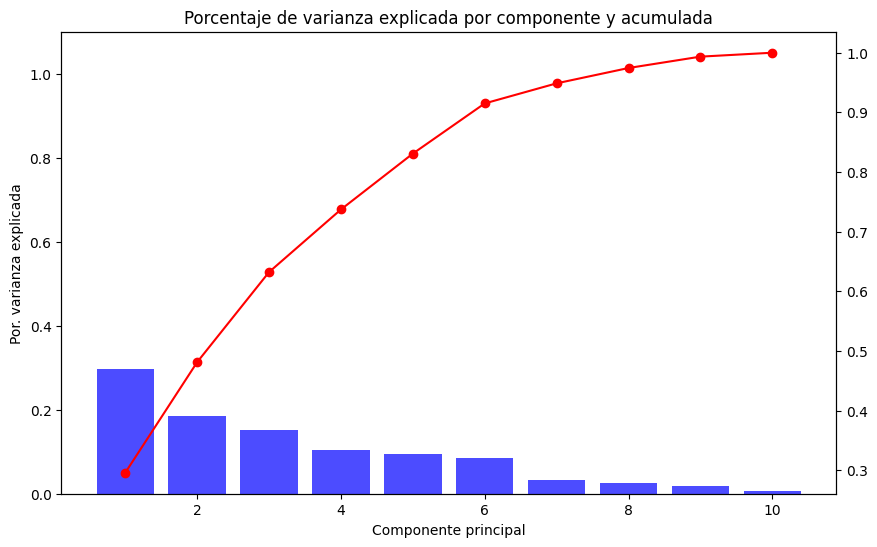

In [109]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para el porcentaje de varianza explicada por cada componente
ax1.bar(
    x=np.arange(pca.n_components_) + 1,
    height=pca.explained_variance_ratio_,
    color='b',
    alpha=0.7,
    label='Varianza explicada por componente'
)

ax1.set_xlabel('Componente principal')
ax1.set_ylabel('Por. varianza explicada')
ax1.set_ylim(0, 1.1)
ax1.set_title('Porcentaje de varianza explicada por componente y acumulada')

# Gráfico de línea para el porcentaje de varianza explicada acumulada
ax2 = ax1.twinx()
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
ax2.plot(
    np.arange(len(df[inputs].columns)) + 1,
    prop_varianza_acum,
    color='r',
    marker='o',
    label='Varianza explicada acumulada'
)
ax2


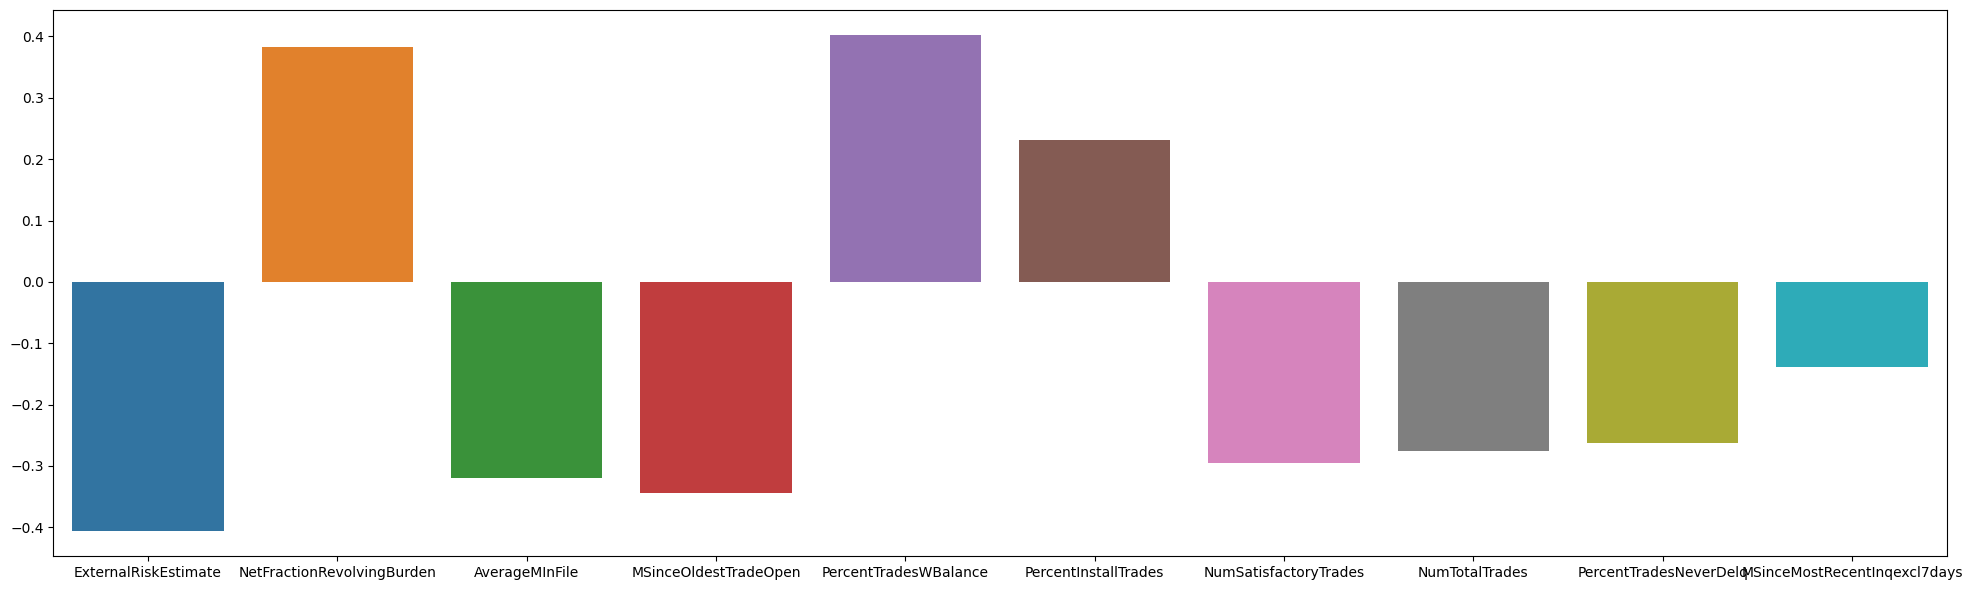

In [108]:
plt.figure(figsize=(20,6))
sns.barplot(x = df[inputs].columns, y = pca.components_[0])
plt.tight_layout()
plt.show()

### Clustering

#### K-Means

#### Método del codo

Text(0, 0.5, 'Intra-cluster (inertia)')

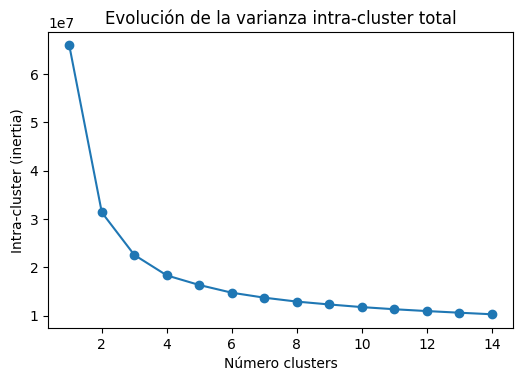

In [66]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit_transform(df[inputs])
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

In [67]:
kmeans = KMeans(n_clusters=2,init="k-means++",random_state=42)
kmeans.fit_transform(df[inputs])

C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[274.16359574, 107.64439498],
       [ 81.62896783, 102.96405157],
       [157.96824278,  45.12911568],
       ...,
       [ 84.95759404, 115.04447722],
       [229.482473  ,  64.85782627],
       [189.00398283, 349.53155005]])

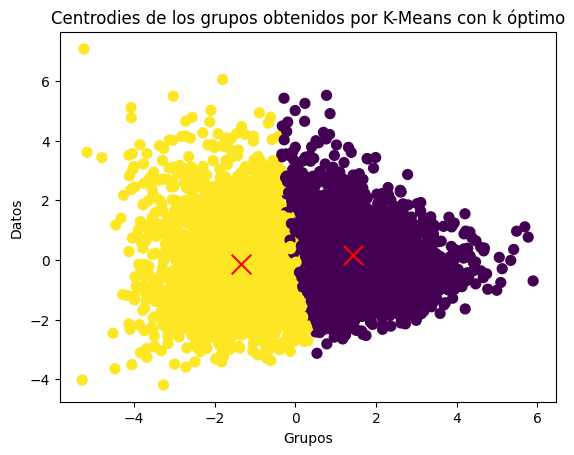

In [75]:
# obtención de los cluters con sus centroides
labels = kmeans.labels_
centroides = kmeans.cluster_centers_
X_kmeans = pca.fit_transform(X)
centroides = pca.transform(centroides)
plt.scatter(X_kmeans[:,0], X_kmeans[:,1], c=labels, s=50, cmap="viridis")
plt.scatter(centroides[:,0], centroides[:,1], marker="x", s=200, c="red")
plt.xlabel("Grupos")
plt.ylabel("Datos")
plt.title("Centrodies de los grupos obtenidos por K-Means con k óptimo")
plt.show()

#### Método de la silueta

C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.18091451170019743


C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.16166287724898884


C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.15324981798356702


C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.16205227995976348


C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.15352609369132456


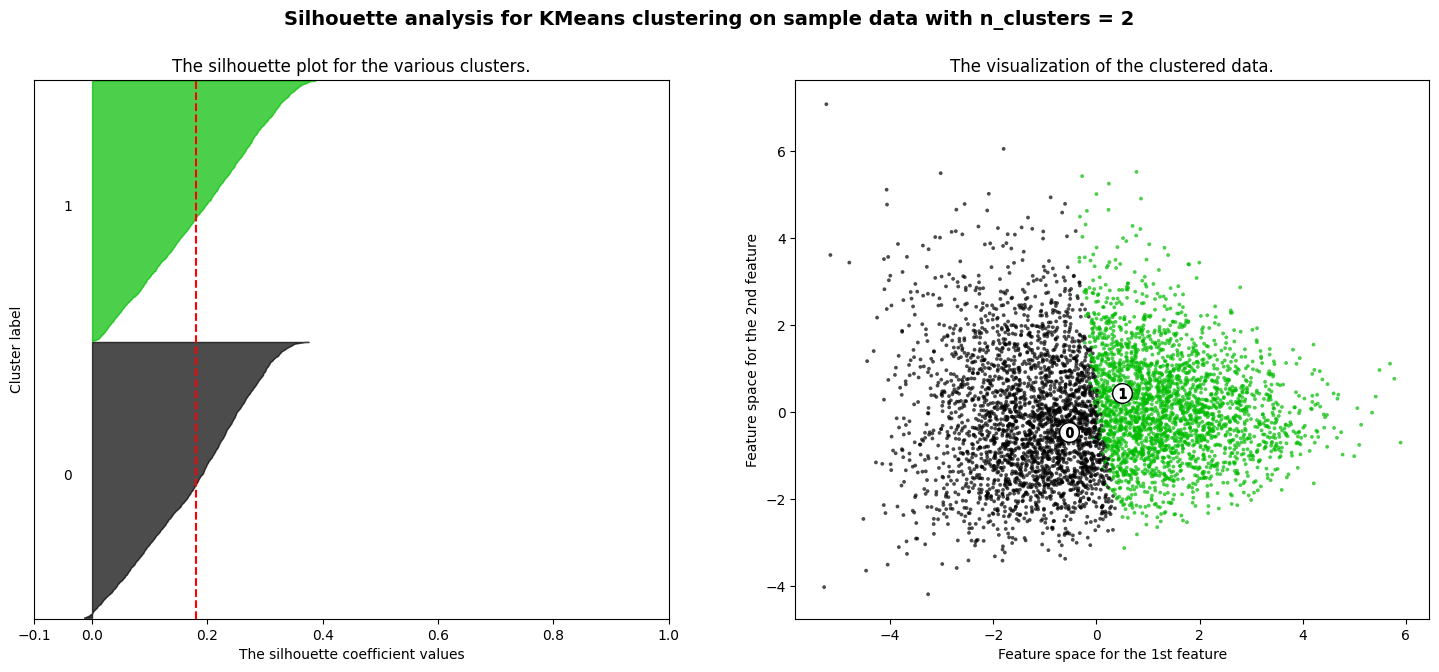

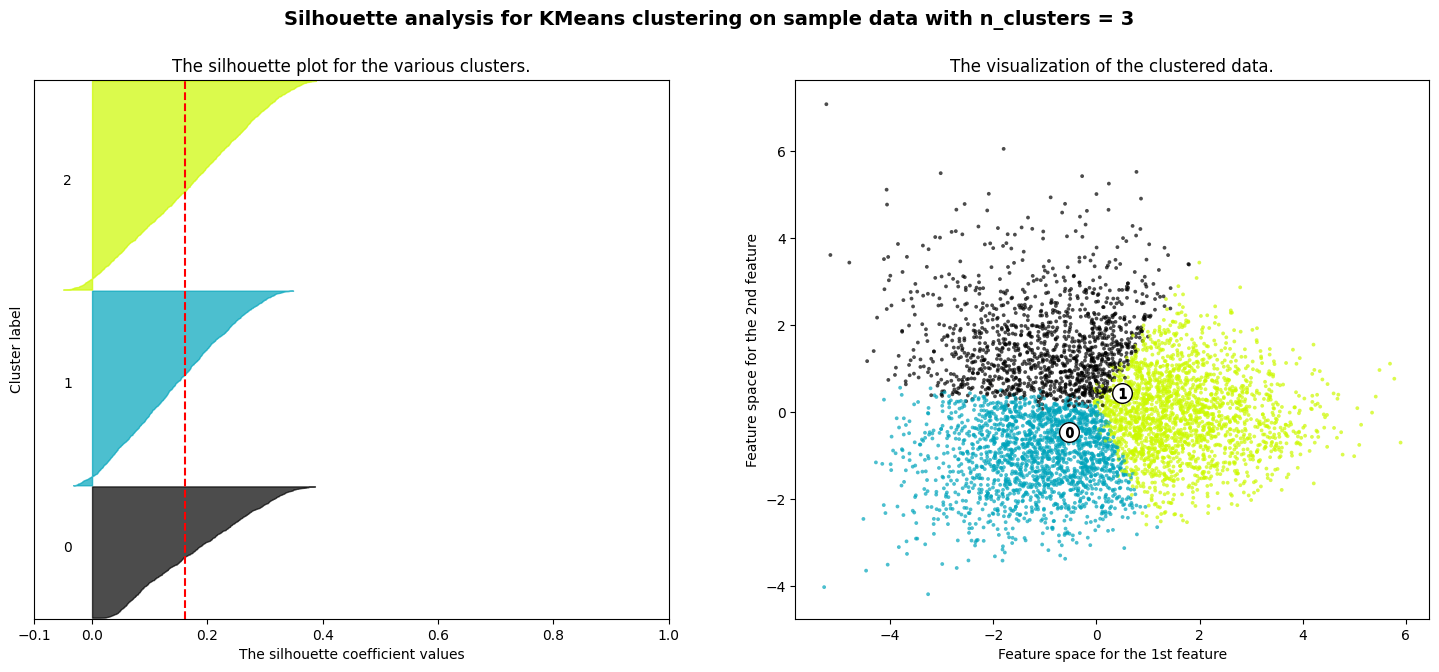

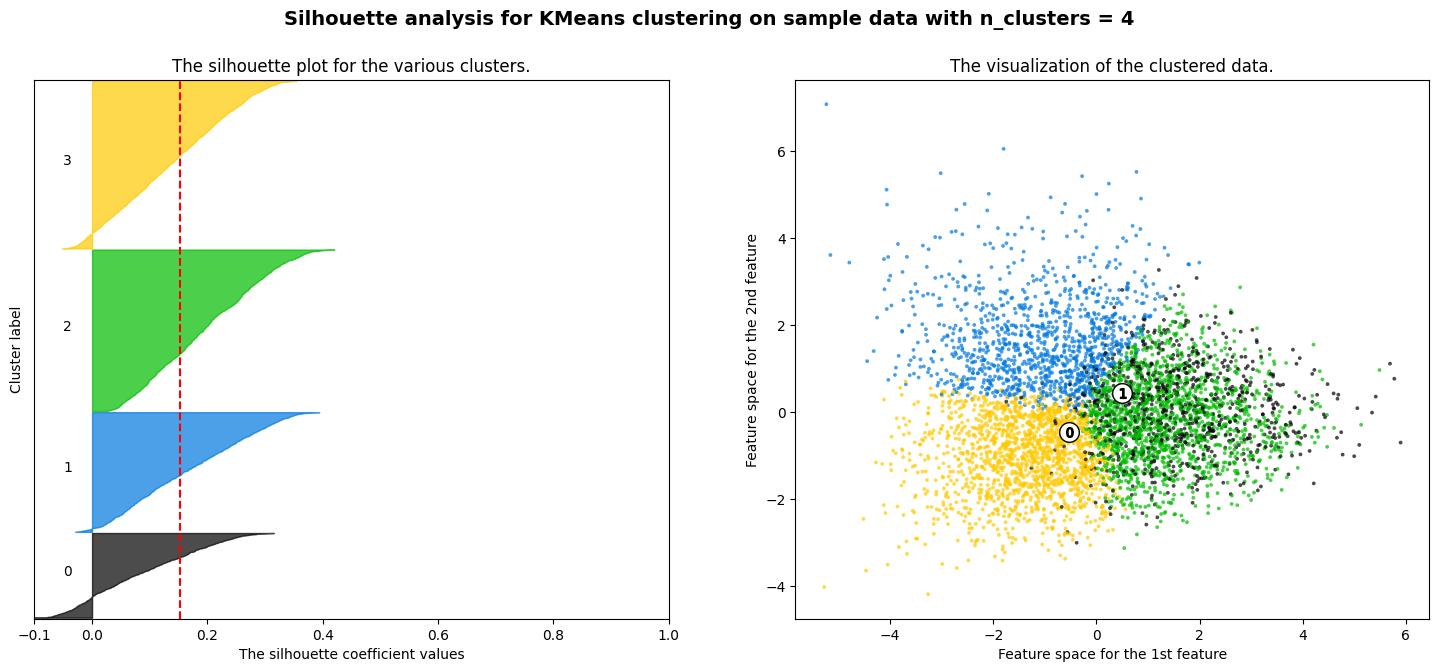

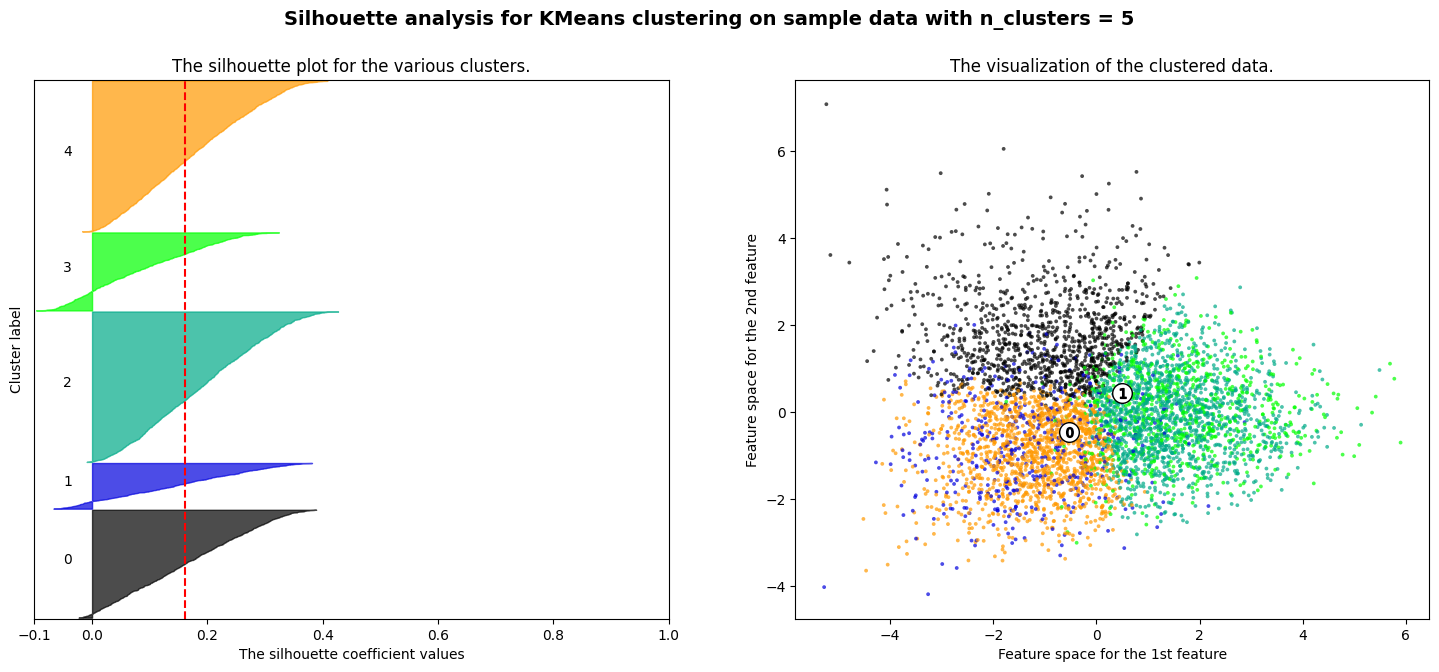

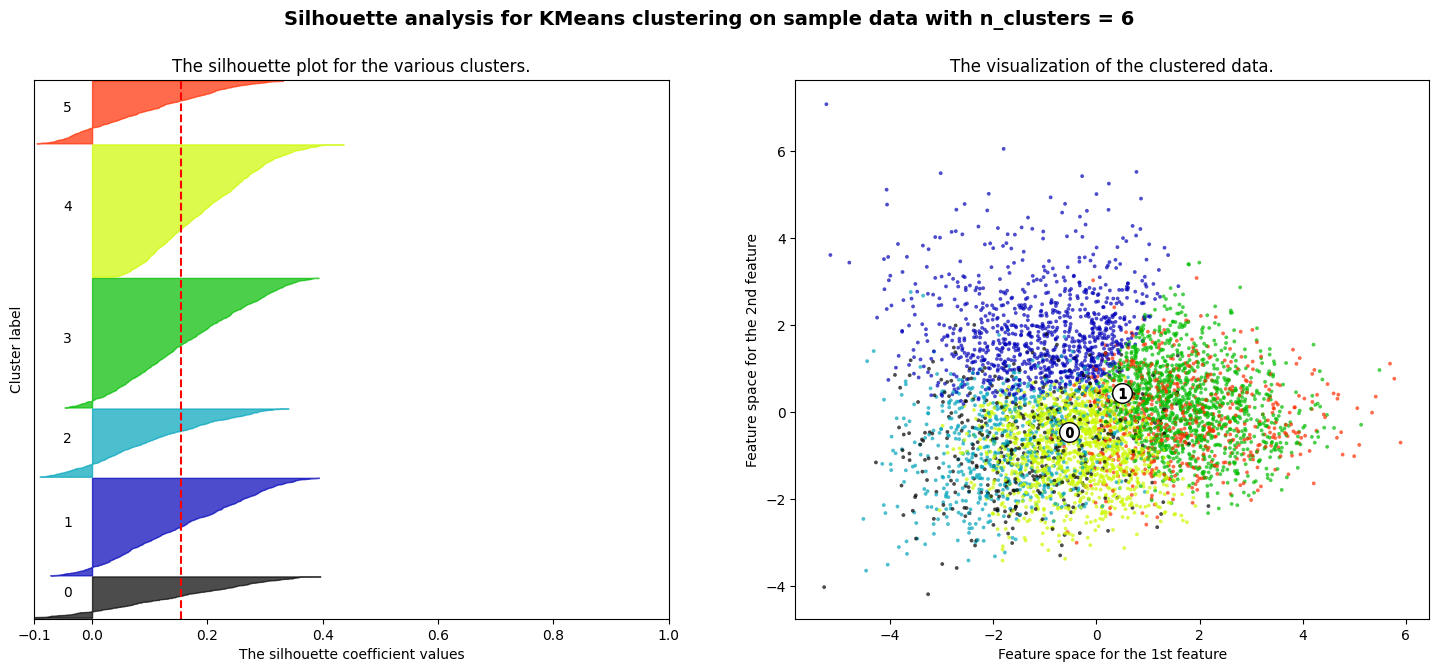

In [76]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    centers = pca.transform(centroides)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

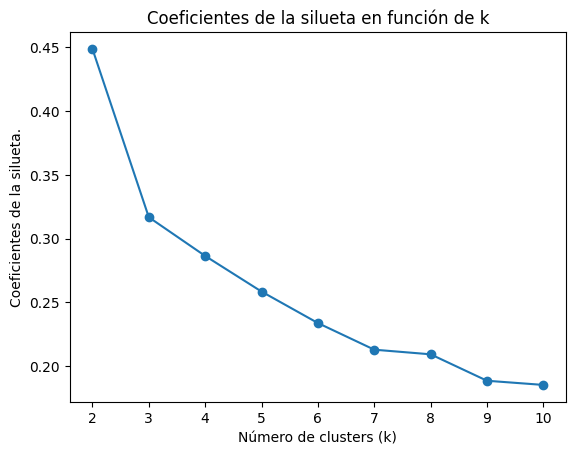

In [ ]:
silhouette_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[inputs])
    score = silhouette_score(df[inputs], kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2,11), silhouette_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Coeficientes de la silueta.")
plt.title("Coeficientes de la silueta en función de k")
plt.show()

#### Árboles Gerárquicos

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# Modelos
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=df[inputs])

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=df[inputs])

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=df[inputs])

C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\meryg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

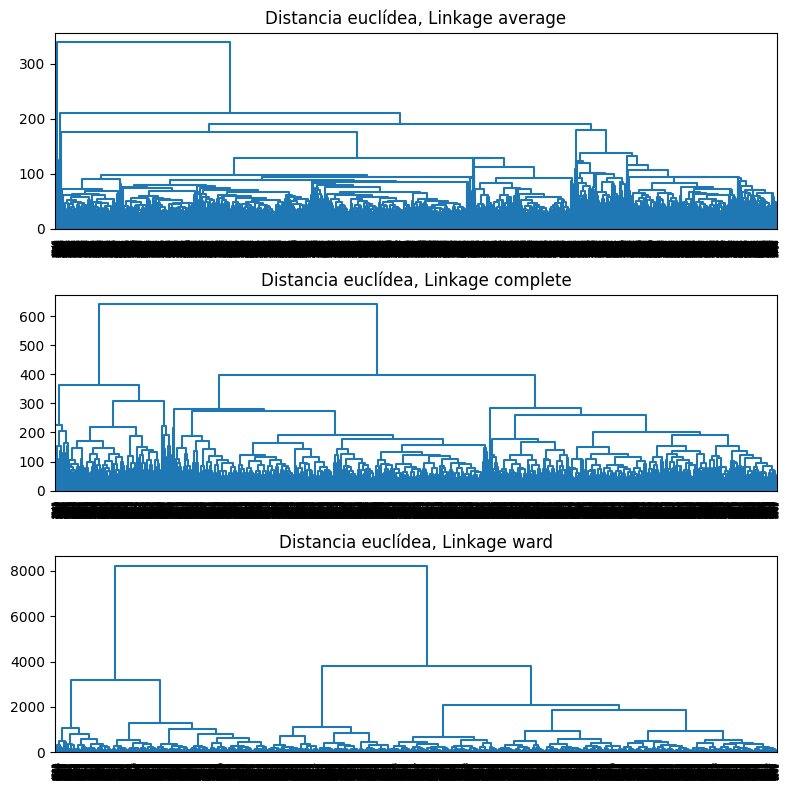

In [ ]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout()

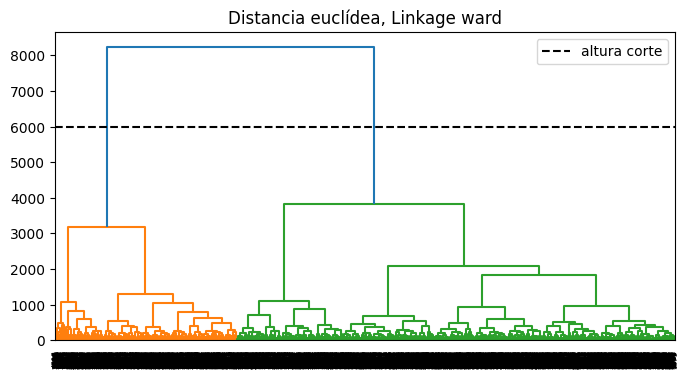

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 6000
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend()

#### Innovación: Gaussian mixture

In [77]:
from sklearn.mixture import GaussianMixture
import matplotlib

In [86]:
modelo_gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=123)
modelo_gmm.fit(X=X_pca)

GaussianMixture(n_components=2, random_state=123)

In [101]:
# Media de cada componente
medias = modelo_gmm.means_
# Matriz de covarianza de cada componente
covs = modelo_gmm.covariances_

In [87]:
probabilidades = modelo_gmm.predict_proba(X_pca)
clasificacion = modelo_gmm.predict(X_pca)

C:\Users\meryg\AppData\Local\Temp\ipykernel_25996\1811509976.py:29: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = matplotlib.patches.Ellipse(gmm.means_[i], j * v[0], j * v[1],


IndexError: index 4 is out of bounds for axis 0 with size 4

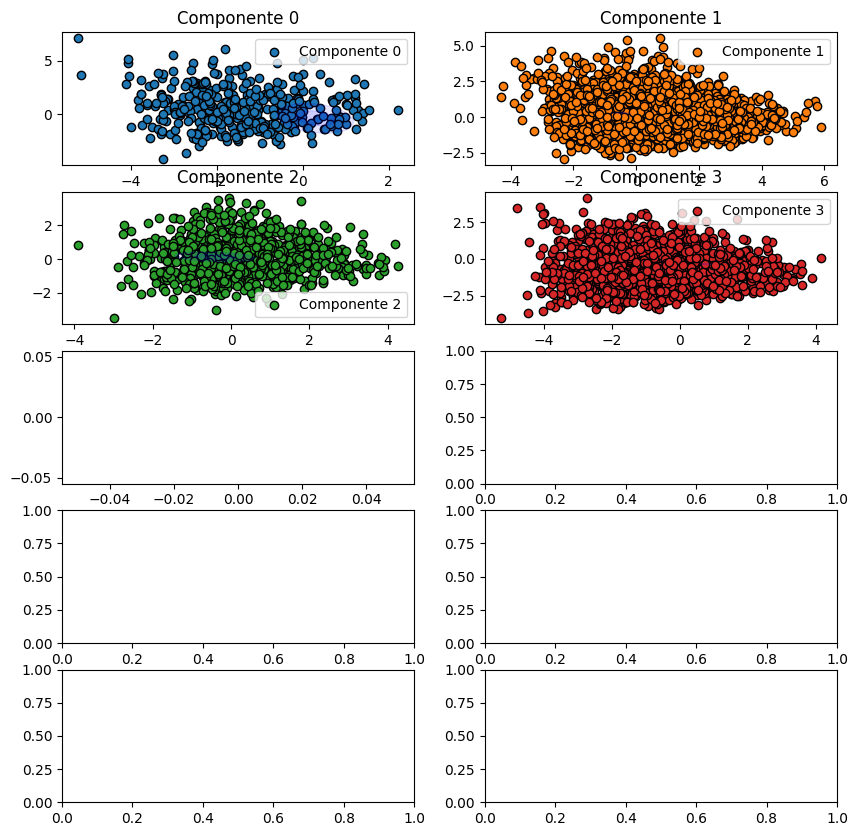

In [112]:
X = scale(df[inputs])

modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
modelo_gmm.fit(X=X)
# Media de cada componente
media_comps = modelo_gmm.means_
# Matriz de covarianza de cada componente
cov_comps = modelo_gmm.covariances_
# Probabilidades
probabilidades = modelo_gmm.predict_proba(X)
# Clasificación (asignación a la componente de mayor probabilidad)
clasificacion = modelo_gmm.predict(X)

def make_ellipses(gmm, ax, i):
    if gmm.covariance_type == 'full':
        covariances = gmm.covariances_[i]
    elif gmm.covariance_type == 'tied':
        covariances = gmm.covariances_
    elif gmm.covariance_type == 'diag':
        covariances = np.diag(gmm.covariances_[i])
    elif gmm.covariance_type == 'spherical':
        covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[i]
    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)

    for j in range(1, 3):
        ell = matplotlib.patches.Ellipse(gmm.means_[i], j * v[0], j * v[1],
                                         180 + angle, color="blue")
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.1)
        ax.add_artist(ell)


fig, axs = plt.subplots(5, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.scatter(
        x=X_pca[clasificacion == i, 0],
        y=X_pca[clasificacion == i, 1],
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f"Componente {i}"
    )
    make_ellipses(modelo_gmm, ax, i)
    ax.set_title(f'Componente {i}')
    ax.legend()

plt.tight_layout()
plt.show()
